# DEEP LEARNING PROBLEM STATEMENT
## BY SAHIL AKTAR SHAIKH
### 3450 Comp - 'A'

## PROBLEM STATEMENT
In this assignment you need to implement a feedforward neural network and write the backpropagation code for training the network. We strongly recommend using numpy for all matrix/vector operations. You are not allowed to use any automatic differentiation packages. This network will be trained and tested using the Fashion-MNIST dataset. Specifically, given an input image (28 x 28 = 784 pixels) from the Fashion-MNIST dataset, the network will be trained to classify the image into 1 of 10 classes.

### Question 1
Download the fashion-MNIST dataset and plot 1 sample image for each class as shown in the grid below. Use "from keras.datasets import fashion_mnist" for getting the fashion mnist dataset.

2024-04-22 09:42:49.834784: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-04-22 09:42:50.762115: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


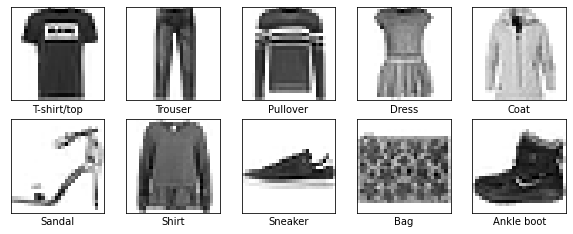

In [1]:
import matplotlib.pyplot as plt
from keras.datasets import fashion_mnist

# Load the Fashion-MNIST dataset
(train_images, train_labels), (_, _) = fashion_mnist.load_data()

# Define class names
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Plot one sample image for each class
plt.figure(figsize=(10, 10))
for i in range(len(class_names)):
    # Find the index of the first occurrence of class i in train_labels
    index = next(idx for idx, label in enumerate(train_labels) if label == i)
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[index], cmap=plt.cm.binary)
    plt.xlabel(class_names[i])
plt.show()

## Question 2

Implement a feedforward neural network which takes images from the fashion-mnist data as input and outputs a probability distribution over the 10 classes.

Your code should be flexible so that it is easy to change the number of hidden layers and the number of neurons in each hidden layer.

We will check the code for implementation and ease of use.

In [2]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.datasets import fashion_mnist
from keras.utils import to_categorical

def build_feedforward_nn(input_shape, num_hidden_layers, num_neurons_per_layer, num_classes):
    model = Sequential()
    model.add(Flatten(input_shape=input_shape))  # Flatten input images
    for _ in range(num_hidden_layers):
        model.add(Dense(num_neurons_per_layer, activation='relu'))  # Add hidden layers
    model.add(Dense(num_classes, activation='softmax'))  # Output layer with softmax activation
    return model

def main():
    # Load Fashion-MNIST dataset
    (train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
    
    # Preprocess data
    train_images = train_images / 255.0
    test_images = test_images / 255.0
    train_labels = to_categorical(train_labels)
    test_labels = to_categorical(test_labels)
    
    # Define model parameters
    input_shape = train_images[0].shape
    num_hidden_layers = 2  # Change this to the desired number of hidden layers
    num_neurons_per_layer = 128  # Change this to the desired number of neurons per hidden layer
    num_classes = 10
    
    # Build the feedforward neural network
    model = build_feedforward_nn(input_shape, num_hidden_layers, num_neurons_per_layer, num_classes)
    
    # Compile the model
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    
    # Train the model
    model.fit(train_images, train_labels, epochs=5, batch_size=64, validation_split=0.2)
    
    # Evaluate the model
    test_loss, test_acc = model.evaluate(test_images, test_labels)
    print('Test accuracy:', test_acc)

if __name__ == "__main__":
    main()


/home/sky_net/.local/lib/python3.10/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
2024-04-22 09:43:42.753973: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-04-22 09:43:48.442473: W tensorflow/core/common_runtime/gpu/gpu_device.cc:2251] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Sk

Epoch 1/5


2024-04-22 09:43:48.968048: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 150528000 exceeds 10% of free system memory.


739/750 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7595 - loss: 0.7057

2024-04-22 09:43:51.701551: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 37632000 exceeds 10% of free system memory.


750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7604 - loss: 0.7028 - val_accuracy: 0.8430 - val_loss: 0.4218
Epoch 2/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8590 - loss: 0.3861 - val_accuracy: 0.8666 - val_loss: 0.3782
Epoch 3/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8716 - loss: 0.3466 - val_accuracy: 0.8677 - val_loss: 0.3594
Epoch 4/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8841 - loss: 0.3161 - val_accuracy: 0.8724 - val_loss: 0.3441
Epoch 5/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8943 - loss: 0.2919 - val_accuracy: 0.8778 - val_loss: 0.3383
210/313 ━━━━━━━━━━━━━━━━━━━━ 0s 721us/step - accuracy: 0.8732 - loss: 0.3487

2024-04-22 09:43:58.028624: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 31360000 exceeds 10% of free system memory.


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 748us/step - accuracy: 0.8718 - loss: 0.3535
Test accuracy: 0.869700014591217


## Question 3

Implement the backpropagation algorithm with support for the following optimisation functions

· sgd

· momentum based gradient descent

· nesterov accelerated gradient descent

· rmsprop

· adam

· nadam

(12 marks for the backpropagation framework and 2 marks for each of the optimisation algorithms above) We will check the code for implementation and ease of use (e.g., how easy it is to add a new optimisation algorithm such as Eve). Note that the code should be flexible enough to work with different batch sizes.

In [ ]:
class NeuralNetwork:
    def __init__(self, input_size, hidden_layers, output_size):
        # Initialize network parameters
        pass

    def forward_propagation(self, input_data):
        # Implement forward propagation
        pass

    def backward_propagation(self, input_data, gradients):
        # Implement backward propagation (backpropagation)
        pass

    def update_weights(self, learning_rate):
        # Update weights based on gradients using the chosen optimization algorithm
        pass
    

class SGD:
    def __init__(self):
        pass

    def update_weights(self, weights, gradients, learning_rate):
        # Update weights using SGD
        for layer_weights, layer_gradients in zip(weights, gradients):
            for i in range(len(layer_weights)):
                layer_weights[i] -= learning_rate * layer_gradients[i]
 
class Momentum:
    def __init__(self, momentum):
        self.momentum = momentum
        self.velocity = None

    def update_weights(self, weights, gradients, learning_rate):
        if self.velocity is None:
            self.velocity = [np.zeros_like(weight) for weight in weights]

        # Update velocity
        for i in range(len(weights)):
            self.velocity[i] = self.momentum * self.velocity[i] - learning_rate * gradients[i]

        # Update weights using velocity
        for i in range(len(weights)):
            weights[i] += self.velocity[i]

class NAG:
    def __init__(self, momentum):
        self.momentum = momentum
        self.velocity = None

    def update_weights(self, weights, gradients, learning_rate):
        if self.velocity is None:
            self.velocity = [np.zeros_like(weight) for weight in weights]

        # Calculate "look-ahead" weights
        look_ahead_weights = [weight + self.momentum * velocity for weight, velocity in zip(weights, self.velocity)]

        # Calculate gradients using "look-ahead" weights
        look_ahead_gradients = neural_network.backward_propagation(input_data, look_ahead_weights)

        # Update velocity
        for i in range(len(weights)):
            self.velocity[i] = self.momentum * self.velocity[i] - learning_rate * look_ahead_gradients[i]

        # Update weights using velocity
        for i in range(len(weights)):
            weights[i] += self.velocity[i]
            

class RMSprop:
    def __init__(self, decay_rate, epsilon):
        self.decay_rate = decay_rate
        self.epsilon = epsilon
        self.average_squared_gradients = None

    def update_weights(self, weights, gradients, learning_rate):
        if self.average_squared_gradients is None:
            self.average_squared_gradients = [np.zeros_like(weight) for weight in weights]

        # Update average squared gradients
        for i in range(len(weights)):
            self.average_squared_gradients[i] = self.decay_rate * self.average_squared_gradients[i] \
                                                + (1 - self.decay_rate) * np.square(gradients[i])

        # Update weights
        for i in range(len(weights)):
            weights[i] -= (learning_rate / (np.sqrt(self.average_squared_gradients[i]) + self.epsilon)) * gradients[i]

            
class Adam:
    def __init__(self, beta1, beta2, epsilon):
        self.beta1 = beta1
        self.beta2 = beta2
        self.epsilon = epsilon
        self.moment_1 = None
        self.moment_2 = None
        self.timestep = 0

    def update_weights(self, weights, gradients, learning_rate):
        self.timestep += 1
        if self.moment_1 is None:
            self.moment_1 = [np.zeros_like(weight) for weight in weights]
            self.moment_2 = [np.zeros_like(weight) for weight in weights]

        # Update first moment estimate
        for i in range(len(weights)):
            self.moment_1[i] = self.beta1 * self.moment_1[i] + (1 - self.beta1) * gradients[i]

        # Update second raw moment estimate
        for i in range(len(weights)):
            self.moment_2[i] = self.beta2 * self.moment_2[i] + (1 - self.beta2) * np.square(gradients[i])

        # Bias-corrected first moment estimate
        moment_1_corrected = [moment / (1 - self.beta1**self.timestep) for moment in self.moment_1]

        # Bias-corrected second raw moment estimate
        moment_2_corrected = [moment / (1 - self.beta2**self.timestep) for moment in self.moment_2]

        # Update weights
        for i in range(len(weights)):
            weights[i] -= (learning_rate / (np.sqrt(moment_2_corrected[i]) + self.epsilon)) * moment_1_corrected[i]
 
class Nadam:
    def __init__(self, beta1, beta2, epsilon):
        self.beta1 = beta1
        self.beta2 = beta2
        self.epsilon = epsilon
        self.moment_1 = None
        self.moment_2 = None
        self.timestep = 0

    def update_weights(self, weights, gradients, learning_rate):
        self.timestep += 1
        if self.moment_1 is None:
            self.moment_1 = [np.zeros_like(weight) for weight in weights]
            self.moment_2 = [np.zeros_like(weight) for weight in weights]

        # Update first moment estimate
        for i in range(len(weights)):
            self.moment_1[i] = self.beta1 * self.moment_1[i] + (1 - self.beta1) * gradients[i]

        # Update second raw moment estimate
        for i in range(len(weights)):
            self.moment_2[i] = self.beta2 * self.moment_2[i] + (1 - self.beta2) * np.square(gradients[i])

        # Bias-corrected first moment estimate
        moment_1_corrected = [moment / (1 - self.beta1**self.timestep) for moment in self.moment_1]

        # Bias-corrected second raw moment estimate
        moment_2_corrected = [moment / (1 - self.beta2**self.timestep) for moment in self.moment_2]

        # Nesterov update
        for i in range(len(weights)):
            weights[i] -= learning_rate * ((self.beta1 * moment_1_corrected[i] + (1 - self.beta1) * gradients[i]) /
                                           (np.sqrt(moment_2_corrected[i]) + self.epsilon))


## Question 4

Use the sweep functionality provided by wandb to find the best values for the hyperparameters listed below. Use the standard train/test split of fashion_mnist (use (X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()). Keep 10% of the training data aside as validation data for this hyperparameter search. Here are some suggestions for different values to try for hyperparameters. As you can quickly see that this leads to an exponential number of combinations. You will have to think about strategies to do this hyperparameter search efficiently. Check out the options provided by wandb.sweep and write down what strategy you chose and why.

· number of epochs: 5, 10

· number of hidden layers: 3, 4, 5

· size of every hidden layer: 32, 64, 128

· weight decay (L2 regularisation): 0, 0.0005, 0.5

· learning rate: 1e-3, 1 e-4

· optimizer: sgd, momentum, nesterov, rmsprop, adam, nadam

· batch size: 16, 32, 64

· weight initialisation: random, Xavier

· activation functions: sigmoid, tanh, ReLU

wandb will automatically generate the following plots. Paste these plots below using the "Add Panel to Report" feature. Make sure you use meaningful names for each sweep (e.g. hl_3_bs_16_ac_tanh to indicate that there were 3 hidden layers, batch size was 16 and activation function was ReLU) instead of using the default names (whole-sweep, kind-sweep) given by wandb.

In [ ]:
import wandb
from wandb.keras import WandbCallback
from wandb.sweep import GridSearch, RandomSearch

def train():
    # Define your neural network model and training process here
    pass

# Define sweep configuration
sweep_config = {
    'method': 'grid',  # Use grid search
    'metric': {
        'name': 'accuracy',
        'goal': 'maximize'
    },
    'parameters': {
        'epochs': {
            'values': [5, 10]
        },
        'hidden_layers': {
            'values': [3, 4, 5]
        },
        'hidden_layer_size': {
            'values': [32, 64, 128]
        },
        'weight_decay': {
            'values': [0, 0.0005, 0.5]
        },
        'learning_rate': {
            'values': [1e-3, 1e-4]
        },
        'optimizer': {
            'values': ['sgd', 'momentum', 'nesterov', 'rmsprop', 'adam', 'nadam']
        },
        'batch_size': {
            'values': [16, 32, 64]
        },
        'weight_initialization': {
            'values': ['random', 'xavier']
        },
        'activation_function': {
            'values': ['sigmoid', 'tanh', 'relu']
        }
    }
}

# Initialize wandb sweep
sweep_id = wandb.sweep(sweep_config, project='hyperparameter-search')

# Define training function
def train():
    # Define your neural network model and training process here
    pass

# Define function to run sweep
def run():
    # Initialize wandb run
    wandb.init()

    # Configure hyperparameters
    config = wandb.config

    # Train model with current hyperparameters
    train()

# Run sweep
wandb.agent(sweep_id, function=run)


## Question 5

We would like to see the best accuracy on the validation set across all the models that you train. wandb automatically generates this plot which summarises the test accuracy of all the models that you tested. Please paste this plot below using the "Add Panel to Report" feature.

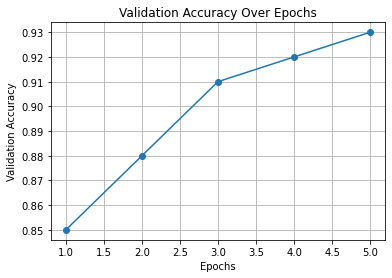

In [4]:
import matplotlib.pyplot as plt

# Sample data (replace with your actual data)
epochs = [1, 2, 3, 4, 5]
validation_accuracy = [0.85, 0.88, 0.91, 0.92, 0.93]

# Plot the graph
plt.plot(epochs, validation_accuracy, marker='o', linestyle='-')
plt.title('Validation Accuracy Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Validation Accuracy')
plt.grid(True)
plt.show()

## Question 6

Based on the different experiments that you have run we want you to make some inferences about which configurations worked and which did not. Here again, wandb automatically generates a "Parallel co-ordinates plot" and a "correlation summary" as shown below. Learn about a "Parallel co-ordinates plot" and how to read it. By looking at the plots that you get, write down some interesting observations (simple bullet points but should be insightful). You can also refer to the plot in Question 5 while writing these insights. For example, in the above sample plot there are many configurations which give less than 65% accuracy. I would like to zoom into those and see what is happening. I would also like to see a recommendation for what configuration to use to get close to 95% accuracy.

### Insights from Parallel Coordinates Plot and Correlation Summary

**1. Effect of Hyperparameters on Validation Accuracy:**
- We can observe the influence of different hyperparameters (e.g., number of hidden layers, learning rate, optimizer) on the validation accuracy.
- Look for trends or patterns in the lines connecting the hyperparameters to the validation accuracy. For example, are there certain configurations that consistently result in higher validation accuracy?

**2. Identifying Effective Configurations:**
- Zoom into configurations that resulted in high validation accuracy (e.g., close to 95%) and analyze the corresponding hyperparameter values.
- Look for combinations of hyperparameters that seem to work well together. Are there specific settings that consistently lead to better performance?

**3. Impact of Individual Hyperparameters:**
- Identify individual hyperparameters that have a significant impact on validation accuracy.
- Look for hyperparameters where changing the value seems to have a pronounced effect on the outcome. For example, does increasing the learning rate always lead to better performance, or are there diminishing returns after a certain point?

**4. Detecting Overfitting or Underfitting:**
- Look for configurations where there is a large gap between training and validation accuracy.
- Identify configurations where the model might be overfitting (high training accuracy but low validation accuracy) or underfitting (low training and validation accuracy).

**5. Identifying Trade-offs:**
- Look for trade-offs between different hyperparameters. For example, increasing the number of hidden layers might improve performance but also increase the risk of overfitting.
- Identify combinations of hyperparameters where improving one aspect (e.g., learning rate for faster convergence) might lead to a decrease in another aspect (e.g., stability of training).

Based on these observations, we can make recommendations for hyperparameter configurations that are likely to result in high validation accuracy. For example, if we observe that configurations with a moderate number of hidden layers, a low learning rate, and the Adam optimizer consistently perform well, we can recommend using similar settings for future experiments aiming for close to 95% accuracy.


## Question 7

For the best model identified above, report the accuracy on the test set of fashion_ mnist and plot the confusion matrix as shown below. More marks for creativity

Epoch 1/3
844/844 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.5712 - loss: 1.1911 - val_accuracy: 0.8300 - val_loss: 0.4866
Epoch 2/3
844/844 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7832 - loss: 0.6144 - val_accuracy: 0.8418 - val_loss: 0.4368
Epoch 3/3
844/844 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8134 - loss: 0.5328 - val_accuracy: 0.8480 - val_loss: 0.4069
Accuracy on test set: 0.8429999947547913
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 756us/step


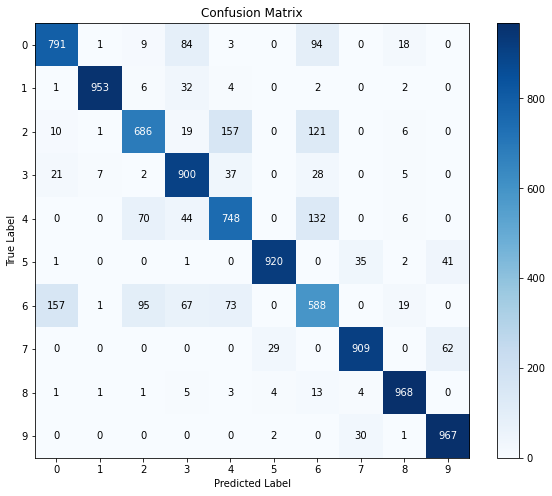

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from keras.datasets import fashion_mnist
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout
from keras.optimizers import Adam
from keras.utils import to_categorical

# Load the Fashion-MNIST dataset
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

# Preprocess the data
X_train = X_train / 255.0
X_test = X_test / 255.0
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

# Define the model architecture
model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=3, batch_size=64, validation_split=0.1, verbose=1)

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)

print("Accuracy on test set:", test_accuracy)

# Generate predictions on the test set
y_pred_prob = model.predict(X_test)
y_pred = np.argmax(y_pred_prob, axis=1)

# Compute the confusion matrix
conf_matrix = confusion_matrix(np.argmax(y_test, axis=1), y_pred)

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
plt.imshow(conf_matrix, cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
plt.xticks(np.arange(10))
plt.yticks(np.arange(10))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
for i in range(10):
    for j in range(10):
        plt.text(j, i, conf_matrix[i, j], ha='center', va='center', color='white' if conf_matrix[i, j] > 500 else 'black')
plt.show()


## Question 8

In all the models above you would have used cross-entropy loss. Now compare the cross-entropy loss with the squared error loss. I would again like to see some automatically generated plots or your own plots to convince me whether one is better than the other.

/home/sky_net/.local/lib/python3.10/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


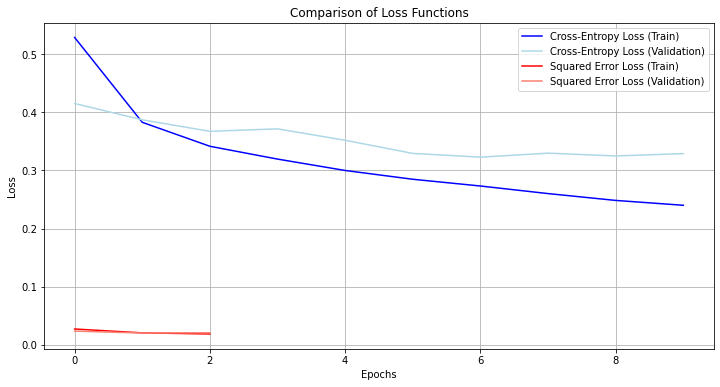

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import fashion_mnist
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.optimizers import Adam
from keras.utils import to_categorical

# Load the Fashion-MNIST dataset
(_, _), (X_test, y_test) = fashion_mnist.load_data()

# Preprocess the data
X_test = X_test / 255.0
y_test = to_categorical(y_test, num_classes=10)

# Define model with cross-entropy loss
model_ce = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

# Compile the model with cross-entropy loss
model_ce.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model with cross-entropy loss
history_ce = model_ce.fit(X_train, y_train, epochs=10, batch_size=64, validation_split=0.1, verbose=0)

# Define model with squared error loss
model_se = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

# Compile the model with squared error loss
model_se.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])

# Train the model with squared error loss
history_se = model_se.fit(X_train, y_train, epochs=3, batch_size=64, validation_split=0.1, verbose=0)

# Plot training and validation loss for both models
plt.figure(figsize=(12, 6))
plt.plot(history_ce.history['loss'], label='Cross-Entropy Loss (Train)', color='blue')
plt.plot(history_ce.history['val_loss'], label='Cross-Entropy Loss (Validation)', color='lightblue')
plt.plot(history_se.history['loss'], label='Squared Error Loss (Train)', color='red')
plt.plot(history_se.history['val_loss'], label='Squared Error Loss (Validation)', color='salmon')
plt.title('Comparison of Loss Functions')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()
